import libraries

In [171]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

Read the data

In [172]:
#read the data
d = pd.read_csv("C:\\Users\\kruth\\Desktop\\Cardiac\\Cardiac_Events_ML\\preprocessing\\inuse_processed_dataset.csv")

#corrections:
#correcting the index values
d.drop(["index"],axis = 1, inplace = True)


# Select all columns except "col_name"
cols = d.columns[d.columns != "oldpeak"]

# Convert the datatype of the selected columns to int64
d[cols] = d[cols].astype(pd.Int64Dtype())



Basic info of dataset

In [173]:
#gives first 5 rows of dataset
d.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [174]:
#indo of every row
d.info()
#there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       300 non-null    Int64  
 1   sex       300 non-null    Int64  
 2   cp        300 non-null    Int64  
 3   trtbps    300 non-null    Int64  
 4   chol      300 non-null    Int64  
 5   fbs       300 non-null    Int64  
 6   restecg   300 non-null    Int64  
 7   thalachh  300 non-null    Int64  
 8   exng      300 non-null    Int64  
 9   oldpeak   300 non-null    float64
 10  slp       300 non-null    Int64  
 11  caa       300 non-null    Int64  
 12  thall     300 non-null    Int64  
 13  output    300 non-null    Int64  
dtypes: Int64(13), float64(1)
memory usage: 36.7 KB


In [175]:
#columns are
print(d.columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [176]:
#important stats about the data
d.describe().T

,count,mean,std,min,25%,50%,75%,max
age,300.0,54.32,9.097627,29.0,47.0,55.0,61.0,77.0
sex,300.0,0.686667,0.464624,0.0,0.0,1.0,1.0,1.0
cp,300.0,0.966667,1.033982,0.0,0.0,1.0,2.0,3.0
trtbps,300.0,131.076667,16.333198,94.0,120.0,130.0,140.0,170.0
chol,300.0,244.44,47.096852,126.0,211.0,240.0,274.0,369.0
fbs,300.0,0.146667,0.354364,0.0,0.0,0.0,0.0,1.0
restecg,300.0,0.533333,0.525811,0.0,0.0,1.0,1.0,2.0
thalachh,300.0,149.56,22.703846,84.0,133.75,152.5,166.0,202.0
exng,300.0,0.326667,0.469778,0.0,0.0,0.0,1.0,1.0
oldpeak,300.0,1.016,1.100202,0.0,0.0,0.8,1.6,4.0


Check for Null values:

In [177]:
d.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

So, no missing values in dataset.

Check for duplicate rows:

In [178]:
#gives the sum of any duplicate rows
d.duplicated().sum()
d.drop_duplicates()
#Hence, there are no duplicate rows.

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
296,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
297,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
298,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Histogram for all features:

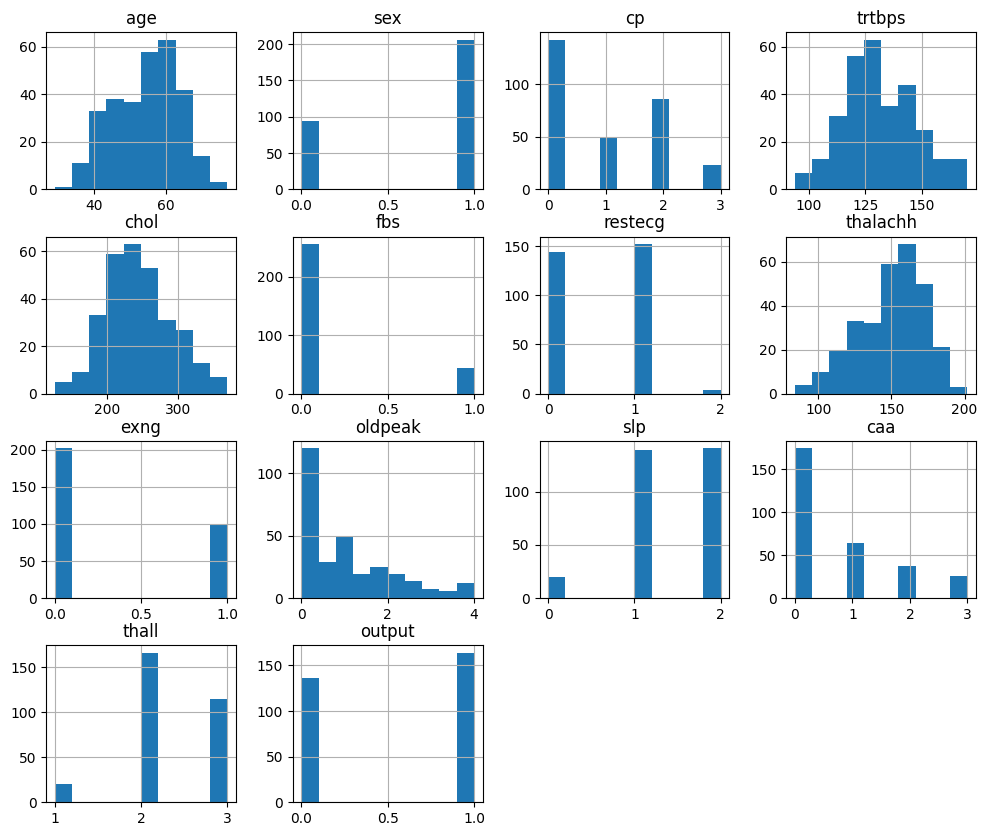

In [179]:
d.hist(figsize = (12,10))
plt.show()

Categorical and Continous Features are:

In [180]:
cont_f = ['age','trtbps', 'chol','thalachh','oldpeak']
cat_f = [ 'sex', 'cp',  'fbs', 'restecg', 'exng', 'slp',  'caa','thall']
Target = [ 'output' ]
print("Continous Features:\n",cont_f)
print("\nCategorical Features:\n",cat_f)
print("\nTarget:\n",Target)

Continous Features:
 ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

Categorical Features:
 ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

Target:
 ['output']


Box plot of whole dataset: to check for outliners

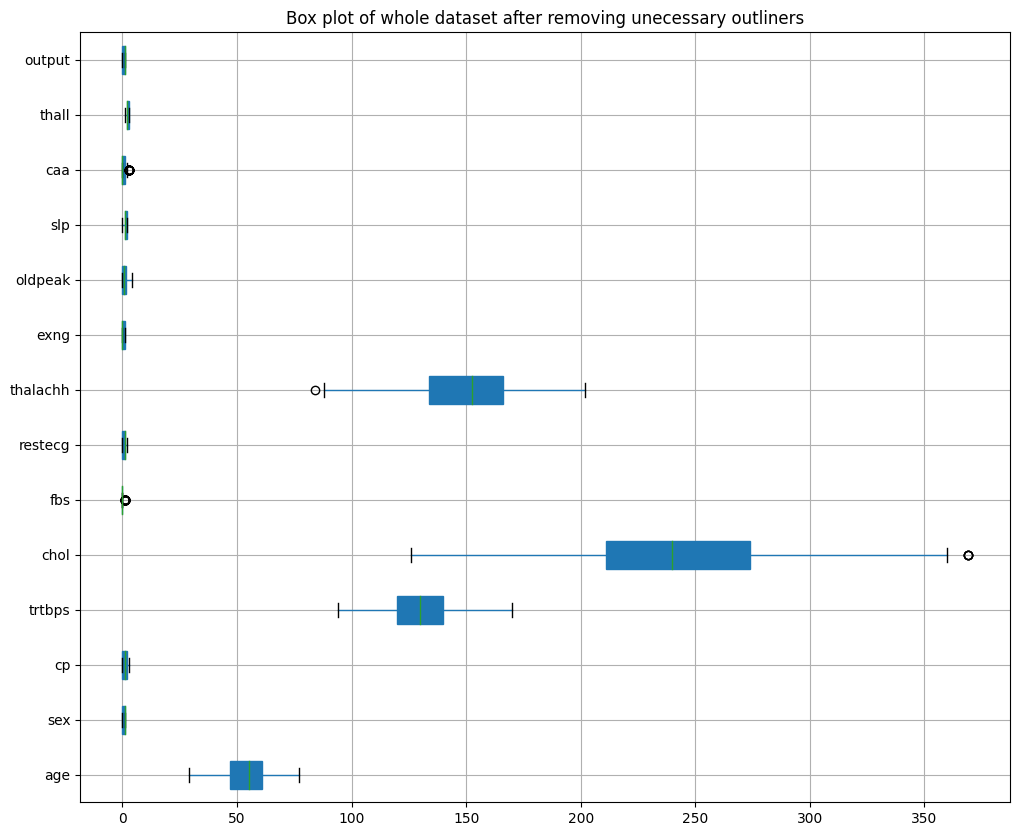

In [181]:
box_plot =d.boxplot(figsize=(12,10), vert = False, patch_artist = True)
plt.title("Box plot of whole dataset after removing unecessary outliners")
plt.show()

We have kept only the essential outliners which are significant in number, hence useful.

More: boxplot for discrete features:

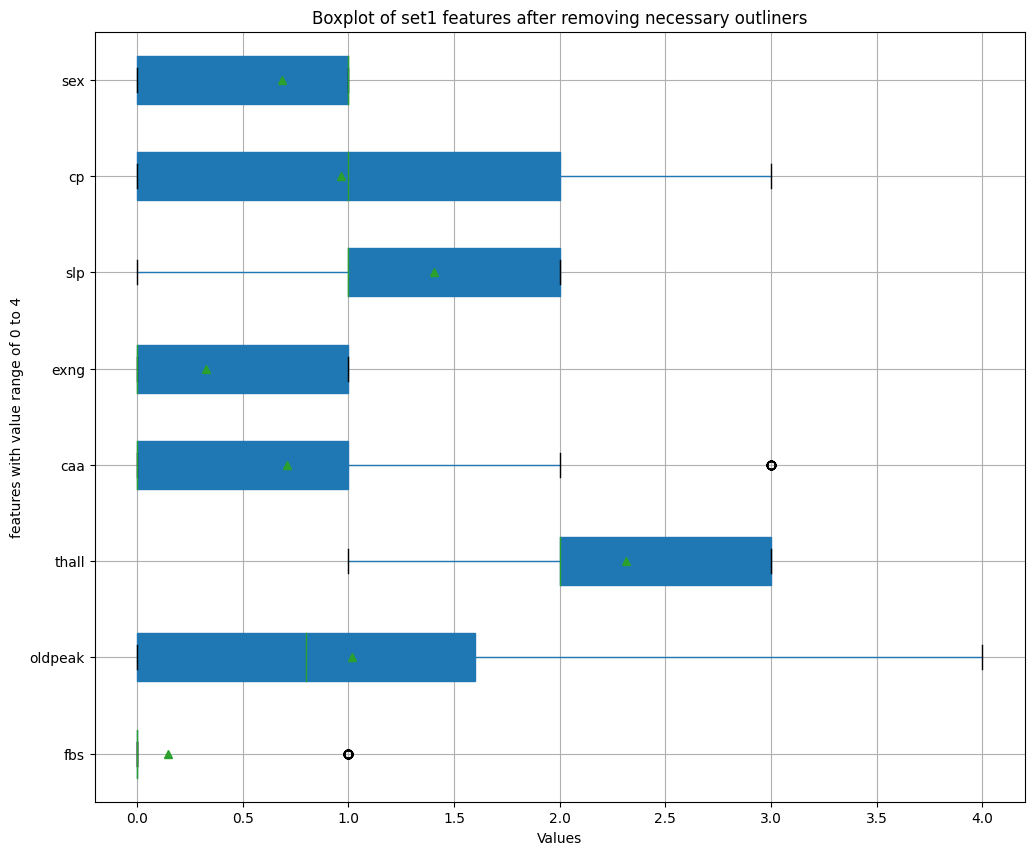

In [182]:
#here
d_sub1 = pd.DataFrame([d.fbs, d.oldpeak, d.thall, d.caa, d.exng, d.slp, d.cp, d.sex]).T
d_sub1.boxplot(figsize =(12,10), patch_artist= True, vert = False, showmeans = True)
plt.xlabel("Values")
plt.ylabel("features with value range of 0 to 4")
plt.title("Boxplot of set1 features after removing necessary outliners")
plt.show()

boxplot for continous features:

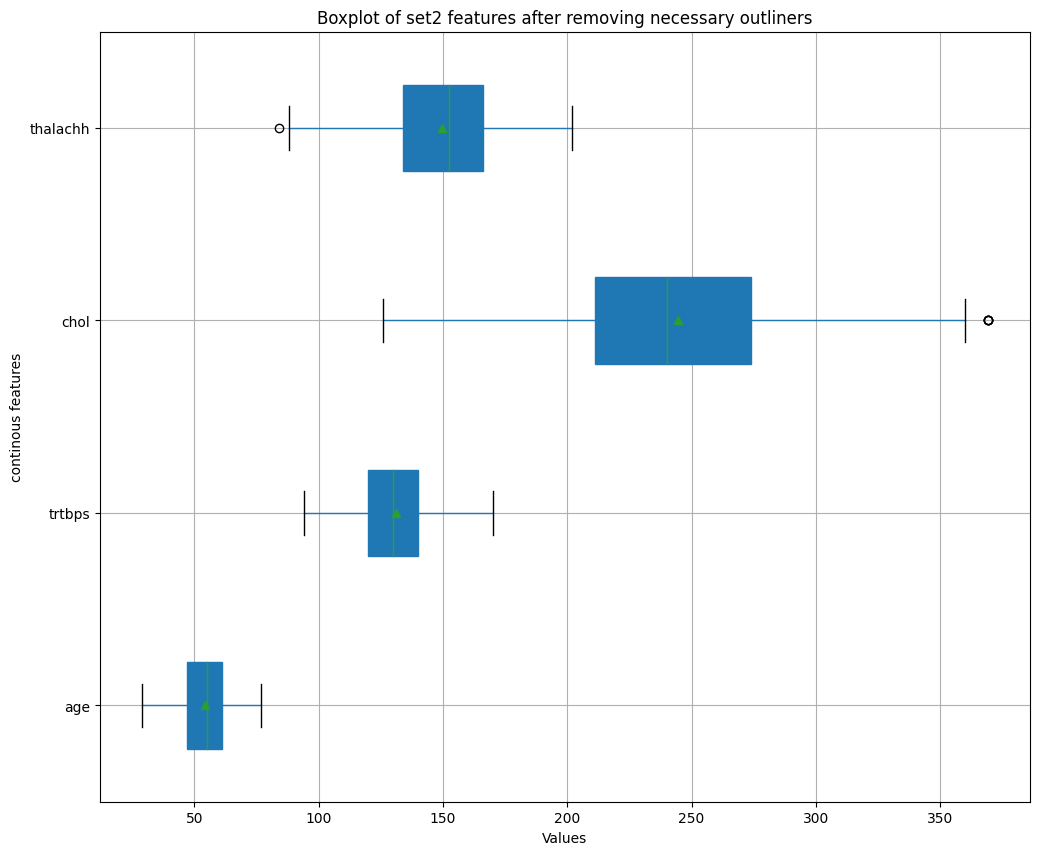

In [183]:
d_sub2 = pd.DataFrame([d.age, d.trtbps, d.chol, d.thalachh]).T
d_sub2.boxplot(figsize =(12,10), patch_artist= True, vert = False, showmeans = True)
plt.xlabel("Values")
plt.ylabel("continous features")
plt.title("Boxplot of set2 features after removing necessary outliners")
plt.show()

OUTPUT(target) value count

output
1    164
0    136
dtype: int64


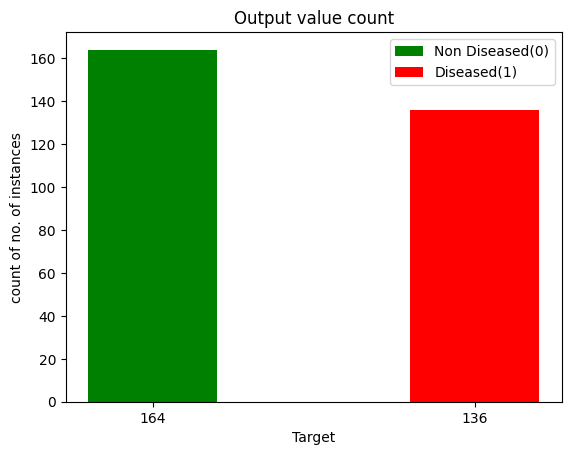

In [184]:
op_count =d.value_counts("output")
print(op_count)
op_count_plot = plt.bar([str(op_count[1.0]),str(op_count[0.0])],op_count, width = 0.4, color = ["g","r"], label = ["Non Diseased(0)","Diseased(1)"])
plt.xlabel("Target")
plt.ylabel("count of no. of instances")
plt.title("Output value count")
plt.legend(loc = "upper right")
plt.show()


We see here that the class distribution is not well balanced! It is more towards Non Diseased. But we may keep it like that since it relatively well balanced!